In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [2]:
#USING TWO DIFFERENT ALGORITHMS FOR CLASSIFICATION MODEL
#importing and reading the dataset
std = pd.read_csv("Stroke_Rating.csv")

In [3]:
#identifying rows and columns
std.shape

(5110, 12)

In [4]:
#exploring dataset
std.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#checking dataset class and object 
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#more statistical exploration 
std.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
std.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


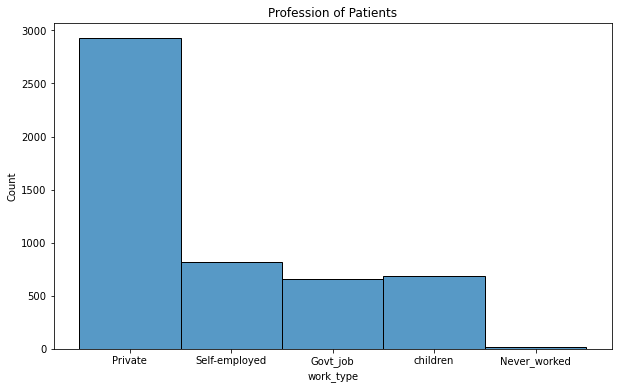

In [8]:
#use of histogram for data exploration
plt.figure(figsize =(10,6))
sns.histplot(std.work_type)
plt.title('Profession of Patients')
plt.show()

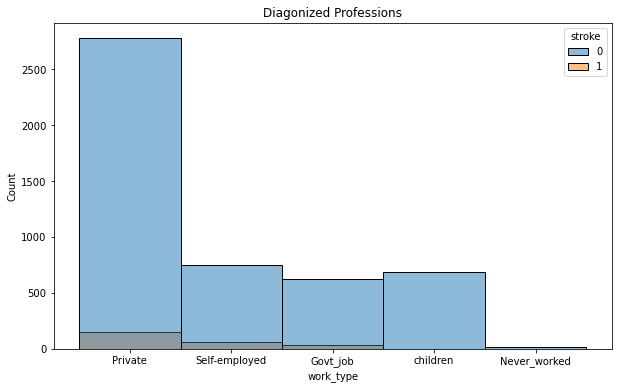

In [9]:
#checking the stroke distribution based on type of work
plt.figure(figsize =(10,6))
sns.histplot(x ='work_type', hue = "stroke", data = std)
plt.title('Diagonized Professions')
plt.show()

In [14]:
#dropping the columns that were not needed
std.drop(columns=['id', 'bmi',],inplace=True)

In [19]:
#from the output verification_result is a categorical value, here we encode to numerical value
#first we get the unique value of the column, example
std.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [21]:
#encoding the column to numerical values
std['gender']=std['gender'].replace(['Male', 'Female', 'Other'],[0,1,2])
std['ever_married']=std['ever_married'].replace(['Yes', 'No'],[0,1])
std['work_type']=std['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],[0,1,2,3,4])
std['Residence_type']=std['Residence_type'].replace(['Urban', 'Rural'],[0,1])
std['smoking_status']=std['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3])

In [22]:
#checking if changes were applied to the stroke dataset std
std.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,0,1
1,1,61.0,0,0,0,1,1,202.21,1,1
2,0,80.0,0,1,0,0,1,105.92,1,1
3,1,49.0,0,0,0,0,0,171.23,2,1
4,1,79.0,1,0,0,1,1,174.12,1,1


In [23]:
std.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
5105,1,80.0,1,0,0,0,0,83.75,1,0
5106,1,81.0,0,0,0,1,0,125.20,1,0
5107,1,35.0,0,0,0,1,1,82.99,1,0
5108,0,51.0,0,0,0,0,1,166.29,0,0
5109,1,44.0,0,0,0,2,0,85.28,3,0


In [25]:
#separating dataset into training and test data using train_test_split and dropping dependent column
from sklearn.model_selection import train_test_split
X = std.drop('stroke',axis=1)
y = std['stroke']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 0)

In [26]:
#training data scaling and transformation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [27]:
#use of KNeighborsClassifier algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski', p=2)
classifier.fit(X_train_s,y_train)

KNeighborsClassifier()

In [28]:
#checking prediction
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 0 ... 0 0 0]


In [29]:
print(y_test)

42      1
380     0
3524    0
352     0
4927    0
       ..
929     0
2629    0
663     0
2303    0
3122    0
Name: stroke, Length: 1533, dtype: int64


In [30]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('---------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.94


Confusion Matrix:
[[1448    9]
 [  76    0]] 


---------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.94      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533



In [31]:
#printing the precision and recalls of the classifier
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_test,y_pred)

In [32]:
precision

array([0.04957599, 0.        , 1.        ])

In [33]:
recall

array([1., 0., 0.])

In [34]:
thresholds

array([0, 1], dtype=int64)

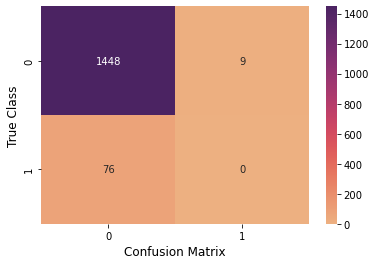

In [35]:
ax = sns.heatmap(cm,cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.xlabel('Confusion Matrix',fontsize=12)
plt.show()

In [37]:
#using Neural network classification algorithm
#checking for class imbalance using count and snsplot
std1 = std.copy()
std1['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#Class imbalance percentage = (Number of instances in the class / Total number of instances in the dataset) x 100%

e:\Ana3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

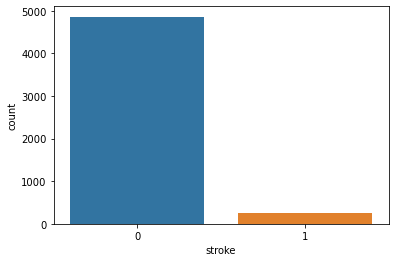

In [38]:
#There was a class inbalance of 95.1% belonging to normal class overrepresented, we further use snsplot to visualize it
#There was a class inbalance of 4.9% belonging to suspect class underrepresented, oversampling is considered
sns.countplot(std1['stroke'])

In [ ]:
#To fix the class imbalance problem, we need to balance the dataset by either oversampling the minority class, undersampling the majority class,
#or using a combination of both. One common technique to balance the dataset is to use oversampling,
#which involves generating synthetic samples for the minority class to increase its size.

In [39]:
#separating training and test datasets
#using StandardScaler estimator to scale the mean of the data to be 0 and standard deviation to be 1.
X1 = std1.drop('stroke',axis=1)
y1 = std1['stroke']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.2, stratify=y, random_state=99)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#using a denser layer to build and train the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12,activation='relu',input_shape=(9,)))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [41]:
#Model compilation using optimizer and loss functions
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics='accuracy')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 3)                 39        
                                                                 
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________


In [43]:
##training by fitting in model for transformation
#using the inverse proportion of the observations
class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
    batch_size = 0, epochs= 50, \
        verbose=2, class_weight=class_weights, \
            validation_split=0.2)

Epoch 1/50
103/103 - 2s - loss: 0.7805 - accuracy: 0.8544 - val_loss: 0.2750 - val_accuracy: 0.9487 - 2s/epoch - 21ms/step
Epoch 2/50
103/103 - 0s - loss: 0.3190 - accuracy: 0.9520 - val_loss: 0.1972 - val_accuracy: 0.9487 - 221ms/epoch - 2ms/step
Epoch 3/50
103/103 - 0s - loss: 0.2777 - accuracy: 0.9520 - val_loss: 0.1818 - val_accuracy: 0.9487 - 227ms/epoch - 2ms/step
Epoch 4/50
103/103 - 0s - loss: 0.2662 - accuracy: 0.9517 - val_loss: 0.1996 - val_accuracy: 0.9450 - 230ms/epoch - 2ms/step
Epoch 5/50
103/103 - 0s - loss: 0.2594 - accuracy: 0.9520 - val_loss: 0.1987 - val_accuracy: 0.9450 - 224ms/epoch - 2ms/step
Epoch 6/50
103/103 - 0s - loss: 0.2552 - accuracy: 0.9523 - val_loss: 0.1820 - val_accuracy: 0.9487 - 233ms/epoch - 2ms/step
Epoch 7/50
103/103 - 0s - loss: 0.2521 - accuracy: 0.9508 - val_loss: 0.1906 - val_accuracy: 0.9487 - 225ms/epoch - 2ms/step
Epoch 8/50
103/103 - 0s - loss: 0.2450 - accuracy: 0.9523 - val_loss: 0.1816 - val_accuracy: 0.9487 - 223ms/epoch - 2ms/step
Ep

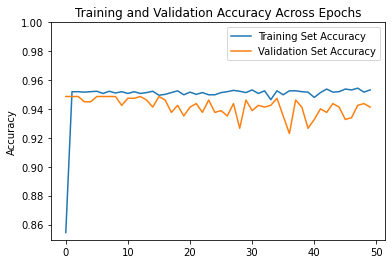

In [44]:
#plottinf and evaluation of the algorithm used
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

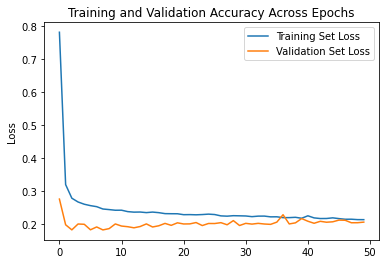

In [45]:
#visualizing  the loss for training and validation
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [46]:
#making a prediction
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

32/32 [==============================] - 0s 1ms/step


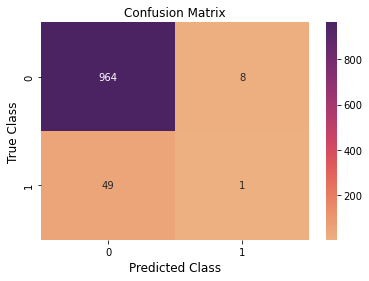

In [48]:
#model result visuals
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [49]:
#summarizing the result of the model built
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.11      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.50      1022
weighted avg       0.91      0.94      0.93      1022

